In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

C:\Users\Yash\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df = pd.read_csv("google_stock_prices.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


In [6]:
# Extract Close prices
data = df['Close'].values.reshape(-1, 1)

In [7]:
# Step 3: Preprocess the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [8]:
# Create sequences for input to RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [9]:
seq_length = 20  # Number of time steps to look back
X, y = create_sequences(scaled_data, seq_length)

In [10]:
# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [11]:
# Step 4: Build the RNN Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=1)
])

In [12]:
# Step 5: Train the Model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10

95/95 [==============================] - 14s 37ms/step - loss: 0.0051
Epoch 2/10
95/95 [==============================] - 3s 37ms/step - loss: 1.3787e-04
Epoch 3/10
95/95 [==============================] - 3s 36ms/step - loss: 1.3713e-04
Epoch 4/10
95/95 [==============================] - 4s 40ms/step - loss: 1.3049e-04
Epoch 5/10
95/95 [==============================] - 3s 37ms/step - loss: 1.3295e-04
Epoch 6/10
95/95 [==============================] - 4s 37ms/step - loss: 1.2829e-04
Epoch 7/10
95/95 [==============================] - 3s 37ms/step - loss: 1.2325e-04
Epoch 8/10
95/95 [==============================] - 3s 37ms/step - loss: 1.2402e-04
Epoch 9/10
95/95 [==============================] - 3s 37ms/step - loss: 1.2097e-04
Epoch 10/10
95/95 [==============================] - 3s 37ms/step - loss: 1.1192e-04


In [16]:
# Step 6: Evaluate the Model
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

24/24 [==============================] - 0s 16ms/step - loss: 5.2094e-04
Test Loss: 0.0005209405208006501


In [17]:
# Step 7: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

24/24 [==============================] - 0s 14ms/step


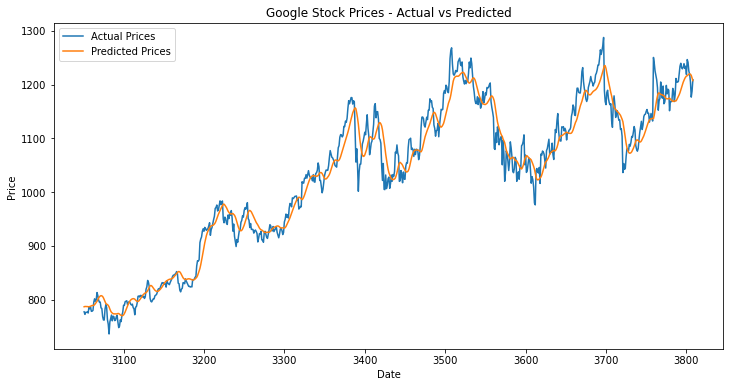

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[split+seq_length:], df['Close'][split+seq_length:], label='Actual Prices')
plt.plot(df.index[split+seq_length:], predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Prices - Actual vs Predicted')
plt.legend()
plt.show()